In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [104]:
#each point is length with type 
data = [[3,1.5, 1], 
        [2, 1,  0],
        [4,1.5, 1],
        [3, 1,  0],
        [3.5,.5,1],
        [2, .5, 0],
        [5.5,1, 1],
        [1, 1,  0]
        ]


In [60]:
#network

#   o    flower_type
#  / \   w1,w2,b
# o  o   length , width


In [5]:
# array = []
# for i in range(len(data)):
#     z = w1 * data[i][0] + w2*data[i][1]+b
#     sigmoid=1/(1+np.exp(-z))
#     print(sigmoid)
#     cost= (sigmoid - data[i][2])**2
#     print(cost)
#     array.append(sigmoid)

In [80]:
def sigmoid(x):
    return 1/(1 +np.exp(-x))
def sigmoid_p(x):
    return sigmoid(x) * (1- sigmoid(x))

In [7]:
# T = np.linspace(-20,100,1000)
# Y = sigmoid (T)
# plt.plot(T,Y)

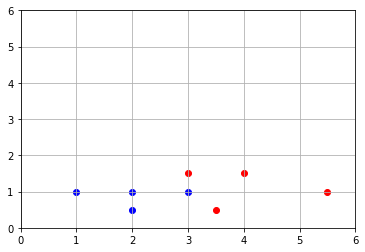

In [106]:
# scatter plot  data 
plt.axis([0,6,0,6])
plt.grid()
for i in range (len(data)):
    point = data[i]
    color = 'r'
    if point[2] == 0:
        color = 'b'
    plt.scatter(point[0],point[1], c=color)
    
    

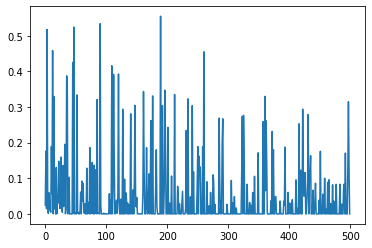

In [105]:
# training loop
learning_rate = 0.2
costs = []

w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()
for i in range(50000):
    # we pick random points from our data
    ri = np.random.randint(len(data))
    point= data[ri]
    # we calculate our prediction and we send this prediction to our sigmoid function to 
    #normalize range between o and 1
    z = w1 * point[0] + w2 * point[1] + b
    prediction = sigmoid(z)
    #we get our actual target  
    target = point[2]
    #we calculate our cost 
    cost = np.square(prediction - target)
    
    dcost_pred =  (prediction-target) * 2
    dpred_dz = sigmoid_p(z)
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_b   = 1
    
    dcost_dz  = dcost_pred * dpred_dz
    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_db  = dcost_dz * dz_b
    #we calculate new weights 
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b  = b - learning_rate * dcost_db
    if i %100 == 0 :
     
        costs.append(cost )

         
plt.plot(costs)